In [271]:
import numpy as np
import pandas as pd
import os
from functools import reduce
import pandas as pd
import re
import glob

print(os.getcwd())


/Users/pthatoi/Desktop/Projects/Research/Healthcare/fwd


In [333]:
df = pd.read_excel('AUG-2021.xlsx')
df.shape
# df.columns = df.iloc[1]

(712, 38)

In [334]:
 # columns
df.columns = columns


In [342]:
df

,SL.NO,DATE,REGISTRATION,NAME & ADDRESS,AGE,SES/BPL/APL,EDUCATION,OCCUPATION,REFRAL,EDD/GA,...,INDUCTION,DT OF DISCHARGE,MOTHER CONDITION,B/O IP NO,GDM,THYROIED,RH-VE,OTHER,"BLOOD TRANSFUSE/ RECIVED, RFF, RDP",CLOT/UN CLOT
0,SL.NO,DATE,REGISTRATION,NAME & ADDRESS,AGE,SES/BPL/APL,EDUCATION,OCCUPATION,REFRAL,EDD/GA,...,INDUCTION,DT OF DISCHARGE,MOTHER CONDITION,B/O IP NO,GDM,THYROIED,RH-VE,OTHER,"BLOOD TRANSFUSE/ RECIVED, RFF, RDP",CLOT/UN CLOT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.8.21,210801006,TRUPTIMAYEE MALLICK,25 YRS,GENERAL,B.A,HOUSE-WIFE/,NaN,NaN,...,NaN,NaN,NaN,210801012,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.30 AM,NaN,W/O- SANDEEP PRESAD SAHOO,NaN,HINDU,B.A,HUS-JOB,NaN,EDD-4.8.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,AT- KASHIPUR,NaN,NaN,NaN,NaN,NaN,GA- 39 WKS 4 DAYS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
column_terminate = 19
row_terminate = 2
df_ = df.iloc[row_terminate:,:column_terminate]
for col in df_.columns.tolist() :
    df_[col] = df_[col].astype(str)

df_['SL.NO'] = pd.to_numeric(df_['SL.NO'], errors='coerce')
df_['AGE'] = df_['AGE'].str.extract(r'(\d+)').astype(float)
# Forward fill the 'SL.NO' column again
df_['SL.NO'] = df_['SL.NO'].ffill()
df_

,SL.NO,DATE,REGISTRATION,NAME & ADDRESS,AGE,SES/BPL/APL,EDUCATION,OCCUPATION,REFRAL,EDD/GA,DIAGNOSIS,METHOD-VD/CS,ELECTIVE/EMERGENCY,INDICATION,HB,BP,HHH,B -G,USG
2,1.0,1.8.21,210801006,TRUPTIMAYEE MALLICK,25.0,GENERAL,B.A,HOUSE-WIFE/,nan,nan,PRIMI AT 39 WKS 4 DAYS POG WITH IUGR WITH,NVD,nan,nan,11.4,110/70,nan,nan,nan
3,1.0,8.30 AM,nan,W/O- SANDEEP PRESAD SAHOO,NaN,HINDU,B.A,HUS-JOB,nan,EDD-4.8.21,HYPOTHYRAIDISIM IN ACTIVE LABOUR,nan,nan,nan,nan,nan,nan,nan,nan
4,1.0,nan,nan,AT- KASHIPUR,NaN,nan,nan,nan,nan,GA- 39 WKS 4 DAYS,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,1.0,nan,nan,PO-/PS- NIRAKARPUR,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,1.0,nan,nan,DIST- KHURDHA,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,92.0,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
708,92.0,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
709,92.0,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
710,92.0,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [93]:
#HEIGHT EXTRACTION
# Forward fill the 'SL.NO' column to replace NaNs with the preceding number
df_['SL.NO'] = df_['SL.NO'].ffill()

# Reinitialize the list to store the data
extracted_data = []

# Initialize current_sl_no outside of the loop
current_sl_no = None

# Iterate through the DataFrame
for _, row in df_.iterrows():
    # Get the current 'SL.NO'
    current_sl_no = row['SL.NO']
    # If the 'REGISTRATION' column contains 'hight-', extract the height value
    if pd.notnull(row['REGISTRATION']) and 'hight-' in str(row['REGISTRATION']):
        current_height = row['REGISTRATION'].split('hight-')[1].split(' ')[0]
        # Append the SL.NO and height to the list
        extracted_data.append({'SL.NO': current_sl_no, 'height': current_height})

# Convert the list of dictionaries to a DataFrame
height_df = pd.DataFrame(extracted_data)

# Drop duplicate rows (if any) to have unique 'SL.NO' - 'height' pairs
height_df = height_df.drop_duplicates()

# Create a DataFrame with unique 'SL.NO' from the original DataFrame
sl_no_df = df_[['SL.NO']].drop_duplicates()

# Merge this with the extracted weight data
# Use an outer join to ensure all 'SL.NO' are included, even if there's no corresponding 'weight'
complete_height_df = sl_no_df.merge(height_df, on='SL.NO', how='left')

complete_height_df.head(10)


,SL.NO,height
0,1.0,152C
1,2.0,152C
2,3.0,NaN
3,4.0,NaN
4,5.0,NaN
5,6.0,NaN
6,7.0,151C
7,8.0,NaN
8,9.0,NaN
9,10.0,152C


In [91]:
# WEIGHT COLUMN EXTRACTION
# Reinitialize the list to store the data for weight extraction
extracted_weight_data = []

# Iterate through the DataFrame
for _, row in df_.iterrows():
    # Get the current 'SL.NO'
    current_sl_no = row['SL.NO']
    # If the 'DATE' column contains 'kg', extract the weight value
    if pd.notnull(row['DATE']) and 'kg' in str(row['DATE']):
        current_weight = row['DATE'].split(' ')[0]  # Assuming the format is 'XX kg'
        # Append the SL.NO and weight to the list
        extracted_weight_data.append({'SL.NO': current_sl_no, 'weight': current_weight})

# Convert the list of dictionaries to a DataFrame
weight_df = pd.DataFrame(extracted_weight_data)

# Drop duplicate rows (if any) to have unique 'SL.NO' - 'weight' pairs
weight_df = weight_df.drop_duplicates()

# Create a DataFrame with unique 'SL.NO' from the original DataFrame
sl_no_df = df_[['SL.NO']].drop_duplicates()

# Merge this with the extracted weight data
# Use an outer join to ensure all 'SL.NO' are included, even if there's no corresponding 'weight'
complete_weight_df = sl_no_df.merge(weight_df, on='SL.NO', how='left')

complete_weight_df.head(10)



,SL.NO,weight
0,1.0,65
1,2.0,65
2,3.0,NaN
3,4.0,NaN
4,5.0,NaN
5,6.0,NaN
6,7.0,72kg
7,8.0,NaN
8,9.0,NaN
9,10.0,68kg


In [114]:
# AGE
age = df_[['SL.NO','AGE']].drop_duplicates().reset_index()
complete_age = age[~age.AGE.isna()].drop(columns=['index'])
complete_age.head(10)

1,SL.NO,AGE
0,1.0,34.0
2,2.0,28.0
4,3.0,31.0
6,4.0,29.0
8,5.0,28.0
10,6.0,26.0
12,7.0,25.0
14,8.0,32.0
16,9.0,23.0
18,10.0,21.0


In [124]:
# LMP COLUMN EXTRACTION
# Reinitialize the list to store the data for weight extraction
extracted_lmp_data = []

# Iterate through the DataFrame
for _, row in df_.iterrows():
    # Get the current 'SL.NO'
    current_sl_no = row['SL.NO']
    # If the 'DATE' column contains 'kg', extract the weight value
    if pd.notnull(row['EDD/GA']) and 'LMP' in str(row['EDD/GA']):
        current_lmp = row['EDD/GA'].split(' ')[0]  # Assuming the format is 'XX kg'
        # Append the SL.NO and weight to the list
        extracted_lmp_data.append({'SL.NO': current_sl_no, 'lmp': current_lmp})

# Convert the list of dictionaries to a DataFrame
lmp_df = pd.DataFrame(extracted_lmp_data)

# Drop duplicate rows (if any) to have unique 'SL.NO' - 'weight' pairs
lmp_df = lmp_df.drop_duplicates()

# Create a DataFrame with unique 'SL.NO' from the original DataFrame
sl_no_df = df_[['SL.NO']].drop_duplicates()

# Merge this with the extracted weight data
# Use an outer join to ensure all 'SL.NO' are included, even if there's no corresponding 'weight'
complete_lmp_df = sl_no_df.merge(lmp_df, on='SL.NO', how='left')
complete_lmp_df['lmp']= complete_lmp_df['lmp'].str.split('-').str[1]
complete_lmp_df.head(10)

,SL.NO,lmp
0,1.0,31.3.20
1,2.0,15.04.20
2,3.0,NaN
3,4.0,5.04.20
4,5.0,29.03.20
5,6.0,10.06.20
6,7.0,NaN
7,8.0,13.04.20
8,9.0,05.04.20
9,10.0,07.04.20


In [164]:
def extract_keyword(df,col,keyword) :
    # Reinitialize the list to store the data for weight extraction
    extracted_data = []

    # Iterate through the DataFrame
    for _, row in df.iterrows():
        # Get the current 'SL.NO'
        current_sl_no = row['SL.NO']
        # If the 'DATE' column contains 'kg', extract the weight value
        if pd.notnull(row[col]) and keyword in str(row[col]):
            current_lmp = row[col].split(' ')[0] # Assuming the format is 'XX kg'
            # Append the SL.NO and weight to the list
            extracted_data.append({'SL.NO': current_sl_no, keyword: current_lmp})

    # Convert the list of dictionaries to a DataFrame
    keyword_df = pd.DataFrame(extracted_data)

    # Drop duplicate rows (if any) to have unique 'SL.NO' - 'weight' pairs
    # print(keyword_df)
    keyword_df = keyword_df.drop_duplicates()

    # Create a DataFrame with unique 'SL.NO' from the original DataFrame
    sl_no_df = df_[['SL.NO']].drop_duplicates()

    # Merge this with the extracted weight data
    # Use an outer join to ensure all 'SL.NO' are included, even if there's no corresponding 'weight'

    complete_keyword_df = sl_no_df.merge(keyword_df, on='SL.NO', how='left')
    return complete_keyword_df

    # complete_lmp_df['lmp']= complete_lmp_df['lmp'].str.split('-').str[1]


In [346]:
df_1= extract_keyword(df_,'REGISTRATION','hight-')
df_2= extract_keyword(df_,'DATE','kg')
df_3= extract_keyword(df_,'EDD/GA','LMP')
# df_4= extract_keyword(df_,'EDD/GA','GA- ')
df_5= extract_keyword(df_,'EDD/GA','EDD')


In [347]:
# extract and combine diagnosis
def remove_nans(lst):
    return [x for x in lst if pd.notnull(x)]

df_6 =  df_[~df_['SL.NO'].isnull()].groupby(['SL.NO']).agg({'INDICATION': list}).reset_index()
df_6['INDICATION'] = df_6['INDICATION'].apply(lambda x : remove_nans(x))
df_6

,SL.NO,INDICATION
0,1.0,"[nan, nan, nan, nan, nan, nan, nan]"
1,2.0,"[nan, nan, nan, nan, nan, nan, nan, nan]"
2,3.0,"[nan, nan, nan, nan, nan, nan, nan]"
3,4.0,"[nan, nan, nan, nan, nan, nan, nan, nan]"
4,5.0,"[nan, nan, nan, nan, nan, nan, nan]"
...,...,...
87,88.0,"[nan, nan, nan, nan, nan, nan, nan, nan]"
88,89.0,"[nan, nan, nan, nan, nan, nan, nan, nan]"
89,90.0,"[nan, nan, nan, nan, nan, nan, nan]"
90,91.0,"[nan, nan, nan, nan, nan, nan, nan]"


In [348]:
# extract and combine diagnosis
def remove_nans(lst):
    return [x for x in lst if pd.notnull(x)]

df_7 =  df_[~df_['SL.NO'].isnull()].groupby(['SL.NO']).agg({'DIAGNOSIS': list}).reset_index()
df_7['DIAGNOSIS'] = df_7['DIAGNOSIS'].apply(lambda x : remove_nans(x))
df_7

,SL.NO,DIAGNOSIS
0,1.0,"[PRIMI AT 39 WKS 4 DAYS POG WITH IUGR WITH, H..."
1,2.0,"[G2A1 AT 39 WKS 4 DAYS POG IN LATENT LABOUR, n..."
2,3.0,[PRIMI AT 37 WKS 3 DAYS POG WITH OI CONCEPTION...
3,4.0,[G3P1L1A1 AT 34 WKS 2 DAYS POG IN PRETERM LABO...
4,5.0,[G2A1 AT 40 WKS 3 DAYS POG WITH OLIGOHYDRAMNI...
...,...,...
87,88.0,[PRIMI AT 39 WKS 6 DAYS POG FOR SAFE CONFINEME...
88,89.0,[PRIMI AT 40 WKS 2 DAYS POG WITH SEVERE OLIGOH...
89,90.0,[G3P1L1A1 AT 38 WK S3 DAYS POG WITH REPAIRED H...
90,91.0,"[PRIMI AT 40 WKS 2 DAYS IN ACTIVE LABOUR, nan,..."


In [349]:
df_8 =  df_[~df_['SL.NO'].isnull()].groupby(['SL.NO']).agg({'                   USG': list}).reset_index()
df_8['USG'] = df_8['                   USG'].apply(lambda x : remove_nans(x))
df_8 = df_8.drop(columns='                   USG')
df_8

,SL.NO,USG
0,1.0,"[nan, nan, nan, nan, nan, nan, nan]"
1,2.0,"[nan, nan, nan, nan, nan, nan, nan, nan]"
2,3.0,"[GA- 36 WKS, SINGLE LIVE INTRAUTERINE FETUS IN..."
3,4.0,"[nan, nan, nan, nan, nan, nan, nan, nan]"
4,5.0,"[GA- 37 WKS 6 DAYS , E.F.W- 3388 +_508 GMS, FH..."
...,...,...
87,88.0,"[GA- 38 WKS 2 DAYS , E.F.W- 3594 +_539 GMS, FH..."
88,89.0,"[GA- 37 WKS , E.F.W- 2951 +_431 GMS, FHR- 134/..."
89,90.0,"[GA- 34 WKS 6 DAYS , E.F.W- 2506 +_375 GMS, FH..."
90,91.0,[SINGLE LIVE INTRAUTERINE FETUS IN CEPHALIC PR...


In [361]:
# additional parameters
df_9 = df_[['SL.NO', 'HB',
     'BP', '         HHH', '           B -G']].drop_duplicates().dropna(how='all', subset = ['HB',
                                                                                             'BP', '         HHH', '           B -G'])
df_9 = df_9[~(df_9.HB=='nan')]
df_9

,SL.NO,HB,BP,HHH,B -G
2,1.0,11.4,110/70,nan,nan
9,2.0,11.1,110/70,nan,nan
17,3.0,11.4,120/80,NO- REACTIVE,B+ VE
24,4.0,9.8,130/80,NO- REACTIVE,A + VE
32,5.0,11.8,110/70,NO- REACTIVE,A + VE
...,...,...,...,...,...
635,89.0,11.6,110/70,NO- REACTIVE,O + VE
643,90.0,9.8,110/70,NO- REACTIVE,O + VE
657,92.0,11.8,110/70,NO- REACTIVE,B + VE
683,92.0,11.2,110/70,NO- REACTIVE,O + VE


In [341]:
df_

,SL.NO,DATE,REGISTRATION,NAME & ADDRESS,AGE,SES/BPL/APL,EDUCATION,OCCUPATION,REFRAL,EDD/GA,DIAGNOSIS,METHOD-VD/CS,ELECTIVE/EMERGENCY,INDICATION,HB,BP,HHH,B -G,USG
3,NaN,8.30 AM,nan,W/O- SANDEEP PRESAD SAHOO,NaN,HINDU,B.A,HUS-JOB,nan,EDD-4.8.21,HYPOTHYRAIDISIM IN ACTIVE LABOUR,nan,nan,nan,nan,nan,nan,nan,nan
4,NaN,nan,nan,AT- KASHIPUR,NaN,nan,nan,nan,nan,GA- 39 WKS 4 DAYS,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,NaN,nan,nan,PO-/PS- NIRAKARPUR,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,NaN,nan,nan,DIST- KHURDHA,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,NaN,nan,nan,PH- 8249494298,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,92.0,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
708,92.0,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
709,92.0,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
710,92.0,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [248]:
# GA Weeks
extracted_gw_data = []
import re


def get_first_element(lst):
    if isinstance(lst, list) and lst:
        return lst[0]
    else:
        return None

# Iterate through the DataFrame
for _, row in df_.iterrows():
    # Get the current 'SL.NO'
    current_sl_no = row['SL.NO']
    # If the 'DATE' column contains 'kg', extract the weight value
    if pd.notnull(row['EDD/GA']) and 'GA' in str(row['EDD/GA']):
        current_lmp = re.findall(r'\d+', row['EDD/GA'])  # Assuming the format is 'XX kg'
        # Append the SL.NO and weight to the list
        extracted_gw_data.append({'SL.NO': current_sl_no, 'GA': current_lmp})

# Convert the list of dictionaries to a DataFrame
gw_df = pd.DataFrame(extracted_gw_data)
gw_df['GA'] = gw_df['GA'].apply(get_first_element)

# Drop duplicate rows (if any) to have unique 'SL.NO' - 'weight' pairs
df_10 = gw_df.drop_duplicates()
df_10

,SL.NO,GA
0,1.0,39
1,2.0,36
2,3.0,38
3,4.0,38
4,5.0,38
...,...,...
89,91.0,39
90,92.0,40
91,93.0,25
92,94.0,38


In [256]:
# create target variable
target_df = df_[~df_['METHOD-VD/CS'].isnull()][['SL.NO','METHOD-VD/CS']].drop_duplicates()
target_df

1,SL.NO,METHOD-VD/CS
3,1.0,LSCS
10,2.0,LSCS
17,3.0,LSCS
25,4.0,LSCS
33,5.0,LSCS
...,...,...
666,91.0,LSCS
673,92.0,NVD
681,93.0,NVD
689,94.0,LSCS


In [263]:
def check_duplicates(df) :
    print(type(df),df.shape)
    assert df['SL.NO'].shape[0] ==  df['SL.NO'].nunique(), 'duplicate found'

In [264]:
for dataset  in [df_1,df_2,df_3,df_5,df_6,df_7,df_8,df_9,df_10,target_df] :
 check_duplicates(dataset)

<class 'pandas.core.frame.DataFrame'> (95, 2)
<class 'pandas.core.frame.DataFrame'> (95, 2)
<class 'pandas.core.frame.DataFrame'> (95, 2)
<class 'pandas.core.frame.DataFrame'> (95, 2)
<class 'pandas.core.frame.DataFrame'> (95, 2)
<class 'pandas.core.frame.DataFrame'> (95, 2)
<class 'pandas.core.frame.DataFrame'> (95, 2)
<class 'pandas.core.frame.DataFrame'> (93, 5)
<class 'pandas.core.frame.DataFrame'> (94, 2)
<class 'pandas.core.frame.DataFrame'> (95, 2)


In [268]:
# merge all dataframes:

from functools import reduce
import pandas as pd
dataset=[df_1,df_2,df_3,df_5,df_6,df_7,df_8,df_9,df_10,target_df]
# Merge all DataFrames on 'SL.NO'
merged_df = reduce(lambda left, right: pd.merge(left, right, on='SL.NO', how='left'), dataset)

print(merged_df.shape)
print(merged_df.isna().sum())
merged_df = merged_df.rename(columns=
    {
        'SL.NO':'sl_no',
        'hight-':'height',
        'kg':'kg',
        'LMP':'lmp',
        'EDD':'edd',
        'INDICATION':'indication',
        'DIAGNOSIS':'diagnosis',
        'USG':'usg',
        'HB':'hb',
        'BP':'bp',
        '         HHH':'hhh',
        '           B -G':'bg',
        'GA':'ga',
        'METHOD-VD/CS':'delivery_mode'
    }

)
merged_df

(95, 14)
SL.NO               0
hight-             39
kg                 39
LMP                27
EDD                 2
INDICATION          0
DIAGNOSIS           0
USG                 0
HB                  6
BP                  2
         HHH       31
           B -G    31
GA                  1
METHOD-VD/CS        0
dtype: int64


,sl_no,height,kg,lmp,edd,indication,diagnosis,usg,hb,bp,hhh,bg,ga,delivery_mode
0,1.0,hight-152C,65,LMP-31.3.20,EDD-06.01.21,[PREV LSCS],[G5P2L2A2 AT 33 WKS WITH PREV LSCS FOR SAFE C...,"[GA- 35 WKS 5 DAYS , E.F.W- 2612 +_381 GMS, FH...",9.9,110/70,NO- REACTIVE,B + VE,39,LSCS
1,2.0,hight-152C,65,LMP-15.04.20,EDD-22.01.21,[],[PRIMI GRAVIDA AT 36 WKS 6 DAYS POG WITH CHOLE...,[SINGLE LIVE FETUS IN CEPHALIC PRESENTATION . ...,13.7,110/70,NO- REACTIVE,AB + VE,36,LSCS
2,3.0,NaN,NaN,NaN,EDD-11.01.21,[CPD],[G4P1L1A2 WITH HYPOTHYRAIDISIM WITH APLA + VE ...,[],10.6,110/80,NaN,NaN,38,LSCS
3,4.0,NaN,NaN,LMP-5.04.20,EDD-12.01.21,[PREV LSCS],[G2P1L1 AT 38 WKS 4 DAYS POG WITH PREV LSCS I...,[SINGLE LIVE FETUS IN CEPHALIC PRESENTATION . ...,11.04,110/70,NO- REACTIVE,A + VE,38,LSCS
4,5.0,NaN,NaN,LMP-29.03.20,EDD-05.01.21,[CPD],[PRIMI GRAVIDA AT 38 WKS POG WITH GDM WITH HYP...,[SINGLE LIVE FETUS IN CEPHALIC PRSENTATION . G...,10.4,110/70,NaN,NaN,38,LSCS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,91.0,NaN,NaN,NaN,EDD-30.1.21,[OLIGOHYDRAMNIOUS],[PRIMI GRAVIDA AT 39 WKS 6 DAYS POG WITH OLIGO...,[],11.7,110/70,NaN,NaN,39,LSCS
91,92.0,hight-147,64,LMP-22.4.20,EDD-29.1.21,[],[PRIMI GRAVIDA AT 40 WKS 1 DAYS POG WITH PROM],[SINGLE LIVE INTRAUTERINE FETUS IN CEPHALIC PR...,NaN,110/80,NO- REACTIVE,B + VE,40,NVD
92,93.0,hight-150,60,LMP-31.7.20,EDD-7.5.21,[],[G2A1 AT 29 WKS POG IN PRE TERM LATENT LABOUR],[SINGLE LIVE INTRAUTERINE FETUS IN CEPHALIC PR...,10.4,110/70,NO- REACTIVE,AB + VE,25,NVD
93,94.0,hight-150,68,LMP-4.05.20,EDD-11.02.21,[CPD],[PRIMI GRAVIDA AT 38 WKS 4 DAYS POG IN LATENT ...,[SINGLE LIVE INTRAUTERINE FETUS IN CEPHALIC PR...,8.6,110/80,NO- REACTIVE,B + VE,38,LSCS


In [269]:
merged_df.to_csv('jan_2021_deliver_mode.csv',index=False)

#### Global Data Extraction & Transformation Pipeline

In [272]:
# Define the path to your 'results' folder
folder_path = os.getcwd()

# Create a pattern to match all .xlsx files
pattern = os.path.join(folder_path, '*.xlsx')

# Use glob.glob to find all files in the folder that match the pattern
xlsx_files = glob.glob(pattern)

# Now xlsx_files contains a list of full file paths. If you want just the filenames, you can do:
xlsx_filenames = [os.path.basename(file) for file in xlsx_files]

print(xlsx_filenames)


['APRIL-2021.xlsx', 'MAY-2021.xlsx', 'JAN-2021.xlsx', 'AUG-2021.xlsx', 'JULY-2021.xlsx', 'JUNE-2021.xlsx', 'FEB-2021.xlsx', 'SEP-2021.xlsx', 'MARCH-2021.xlsx']


In [475]:
def extract_keyword(df,col,keyword) :
    # Reinitialize the list to store the data for weight extraction
    extracted_data = []

    # Iterate through the DataFrame
    for _, row in df.iterrows():
        # Get the current 'SL.NO'
        current_sl_no = row['SL.NO']
        # If the 'DATE' column contains 'kg', extract the weight value
        if pd.notnull(row[col]) and keyword in str(row[col]):
            current_lmp = row[col].split(' ')[0] # Assuming the format is 'XX kg'
            # Append the SL.NO and weight to the list
            extracted_data.append({'SL.NO': current_sl_no, keyword: current_lmp})

    # Convert the list of dictionaries to a DataFrame
    keyword_df = pd.DataFrame(extracted_data)

    # Drop duplicate rows (if any) to have unique 'SL.NO' - 'weight' pairs
    # print(keyword_df)
    keyword_df = keyword_df.drop_duplicates()

    # Create a DataFrame with unique 'SL.NO' from the original DataFrame
    sl_no_df = df_[['SL.NO']].drop_duplicates()

    # Merge this with the extracted weight data
    # Use an outer join to ensure all 'SL.NO' are included, even if there's no corresponding 'weight'

    complete_keyword_df = sl_no_df.merge(keyword_df, on='SL.NO', how='left')
    return complete_keyword_df

    # complete_lmp_df['lmp']= complete_lmp_df['lmp'].str.split('-').str[1]


def remove_nans(lst):
    return [x for x in lst if pd.notnull(x)]


def get_first_element(lst):
    if isinstance(lst, list) and lst:
        return lst[0]
    else:
        return None

columns = df.columns

def f_global_data_pref(filename,columns):
    '''
    function to prepare global dataframe with initial features
    :param filename: list of xlsx files
    :return: dataframe
    '''
    print(filename)
    df = pd.read_excel(filename)
    df.columns = columns
    print(df.shape)

    column_terminate = 19
    row_terminate = 2

    df_ = df.iloc[row_terminate:,:column_terminate]
    for col in df_.columns.tolist() :
        df_[col] = df_[col].astype(str)

    df_['SL.NO'] = pd.to_numeric(df_['SL.NO'], errors='coerce')
    df_['AGE'] = df_['AGE'].str.extract(r'(\d+)').astype(float)
    # Forward fill the 'SL.NO' column again
    df_['SL.NO'] = df_['SL.NO'].ffill()

    df_1= extract_keyword(df_,'REGISTRATION','hight-')
    df_1['hight-'] = df_1['hight-'].str.extract(r'(\d+)').astype(float)

    df_2= extract_keyword(df_,'DATE','kg')
    df_2['kg'] = df_2['kg'].str.extract(r'(\d+)').astype(float)

    df_3= extract_keyword(df_,'EDD/GA','LMP')
    df_3['LMP']=df_3['LMP'].str.split('-').str[1]

    df_4 = df_[['SL.NO','AGE']].drop_duplicates()
    df_4 = df_4.query("AGE != 'NaN'")

    print(df_4.head())
    # df_4= extract_keyword(df_,'EDD/GA','GA- ')

    df_5= extract_keyword(df_,'EDD/GA','EDD')
    df_5['EDD']=df_5['EDD'].str.split('-').str[1]

    # extract and combine diagnosis
    df_6 =  df_[~df_['SL.NO'].isnull()].groupby(['SL.NO']).agg({'INDICATION': list}).reset_index()
    df_6['INDICATION'] = df_6['INDICATION'].apply(lambda x : remove_nans(x))

    # extract and combine diagnosis
    df_7 =  df_[~df_['SL.NO'].isnull()].groupby(['SL.NO']).agg({'DIAGNOSIS': list}).reset_index()
    df_7['DIAGNOSIS'] = df_7['DIAGNOSIS'].apply(lambda x : remove_nans(x))

    # create sonography diagnosis
    df_8 = df_[~df_['SL.NO'].isnull()].groupby(['SL.NO']).agg({'                   USG': list}).reset_index()
    df_8['USG'] = df_8['                   USG'].apply(lambda x: remove_nans(x))
    df_8 = df_8.drop(columns='                   USG')

    # additional parameters
    df_9 = df_[['SL.NO', 'HB',
                'BP', '         HHH', '           B -G']].drop_duplicates().dropna(how='all', subset = ['HB',
                                                                                                  'BP', '         HHH', '           B -G'])
    df_9 = df_9[~(df_9.HB=='nan')]

    # GA Weeks
    extracted_gw_data = []
    for _, row in df_.iterrows():
        # Get the current 'SL.NO'
        current_sl_no = row['SL.NO']
        # If the 'DATE' column contains 'kg', extract the weight value
        if pd.notnull(row['EDD/GA']) and 'GA' in str(row['EDD/GA']):
            current_lmp = re.findall(r'\d+', row['EDD/GA'])  # Assuming the format is 'XX kg'
            # Append the SL.NO and weight to the list
            extracted_gw_data.append({'SL.NO': current_sl_no, 'GA': current_lmp})

    # Convert the list of dictionaries to a DataFrame
    gw_df = pd.DataFrame(extracted_gw_data)
    gw_df['GA'] = gw_df['GA'].apply(get_first_element)

    # Drop duplicate rows (if any) to have unique 'SL.NO' - 'weight' pairs
    df_10 = gw_df.drop_duplicates()

    # create target variable
    target_df = df_[~((df_['METHOD-VD/CS'].isnull()) | (df_['METHOD-VD/CS']=='nan'))][['SL.NO','METHOD-VD/CS']].drop_duplicates()

    # merge all dataframes:
    dataset=[df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,target_df]
    # Merge all DataFrames on 'SL.NO'

    merged_df = reduce(lambda left, right: pd.merge(left, right, on='SL.NO', how='left'), dataset)

    # print(merged_df.isna().sum())
    merged_df = merged_df.rename(columns=
    {
        'SL.NO':'sl_no',
        'hight-':'height',
        'AGE':'age',
        'kg':'kg',
        'LMP':'lmp',
        'EDD':'edd',
        'INDICATION':'indication',
        'DIAGNOSIS':'diagnosis',
        'USG':'usg',
        'HB':'hb',
        'BP':'bp',
        '         HHH':'hhh',
        '           B -G':'bg',
        'GA':'ga_weeks',
        'METHOD-VD/CS':'delivery_mode'
    })
    merged_df['filename'] = filename
    print(merged_df.shape, merged_df['sl_no'].nunique())


    print(f'data processed for :{filename}, final output : {merged_df.shape} ')
    print()
    print('---------------------')
    return merged_df


In [455]:
df_['AGE']

2      25.0
3       NaN
4       NaN
5       NaN
6       NaN
       ... 
707     NaN
708     NaN
709     NaN
710     NaN
711     NaN
Name: AGE, Length: 710, dtype: float64

In [476]:
columns=[                             'SL.NO',
                                      'DATE',
                                      'REGISTRATION',
                                      '    NAME  &  ADDRESS',
                                      'AGE',
                                      'SES/BPL/APL',
                                      'EDUCATION',
                                      'OCCUPATION',
                                      'REFRAL',
                                      'EDD/GA',
                                      'DIAGNOSIS',
                                      'METHOD-VD/CS',
                                      'ELECTIVE/EMERGENCY',
                                      'INDICATION',
                                      'HB',
                                      'BP',
                                      '         HHH',
                                      '           B -G',
                                      '                   USG',
                                      'DRS NAME & UNIT',
                                      'BABY--TOB',
                                      'DOB',
                                      'SEX',
                                      'WT',
                                      'APGAR',
                                      'NICU',
                                      'INDICATION',
                                      'TRANS-OUT-BABY',
                                      'INDUCTION',
                                      ' DT  OF   DISCHARGE',
                                      'MOTHER CONDITION',
                                      'B/O   IP NO',
                                      'GDM',
                                      'THYROIED',
                                      'RH-VE',
                                      'OTHER',
                                      'BLOOD TRANSFUSE/ RECIVED, RFF, RDP',
                                      'CLOT/UN CLOT'
                                      ]

print(len(columns))
dataframes = []

for filename in xlsx_filenames:
    temp = f_global_data_pref(filename,columns)
    dataframes.append(temp)

df_delivery = pd.concat(dataframes,ignore_index=True)
df_delivery = df_delivery.reset_index().rename(columns={'index':'patient_id'}).drop(columns='sl_no')

print('output dataset shape: ',df_delivery.shape)

38
APRIL-2021.xlsx
(708, 38)
    SL.NO   AGE
2     NaN   NaN
3     1.0  39.0
4     1.0   NaN
11    2.0  25.0
12    2.0   NaN
(194, 16) 92
data processed for :APRIL-2021.xlsx, final output : (194, 16) 

---------------------
MAY-2021.xlsx
(779, 38)
    SL.NO   AGE
2     NaN   NaN
3     1.0  26.0
4     1.0   NaN
9     2.0  21.0
10    2.0   NaN
(184, 16) 92
data processed for :MAY-2021.xlsx, final output : (184, 16) 

---------------------
JAN-2021.xlsx
(703, 38)
    SL.NO   AGE
2     NaN   NaN
3     1.0  34.0
4     1.0   NaN
10    2.0  28.0
11    2.0   NaN
(184, 16) 92
data processed for :JAN-2021.xlsx, final output : (184, 16) 

---------------------
AUG-2021.xlsx
(694, 38)
    SL.NO   AGE
2     1.0  25.0
3     1.0   NaN
9     2.0  25.0
10    2.0   NaN
17    3.0  29.0
(190, 16) 92
data processed for :AUG-2021.xlsx, final output : (190, 16) 

---------------------
JULY-2021.xlsx
(530, 38)
    SL.NO   AGE
2     1.0  32.0
3     1.0   NaN
9     2.0  29.0
10    2.0   NaN
17    3.0  30.0
(162

In [426]:
df_delivery.to_csv('df_delivery_mode_02_24.csv',index=False)

In [416]:
import datetime

# df_delivery['lmp'] = pd.to_datetime(df_delivery['lmp'])
# df_delivery['edd'] = pd.to_datetime(df_delivery['edd'])

df_delivery['lmp']=df_delivery['lmp'].astype('str')

In [478]:
df_delivery.query("age != 'NaN'")

,patient_id,height,kg,lmp,age,edd,indication,diagnosis,usg,hb,bp,hhh,bg,ga_weeks,delivery_mode,filename
0,0,147.0,77.0,9.7.20,39.0,16.4.21,"[PREV LSCS &, UN CONTROL B/P, nan, nan, nan, n...","[G2P1L1 WITH CHRONIC WITH HTN WITH PREV LSCS, ...","[GA-36 WKS 4 DAYS , E.F.W- 3044 +_457 GMS, FHR...",10.6,110/70,NO- REACTIVE,O + VE,37,LSCS,APRIL-2021.xlsx
1,1,147.0,77.0,9.7.20,NaN,16.4.21,"[PREV LSCS &, UN CONTROL B/P, nan, nan, nan, n...","[G2P1L1 WITH CHRONIC WITH HTN WITH PREV LSCS, ...","[GA-36 WKS 4 DAYS , E.F.W- 3044 +_457 GMS, FHR...",10.6,110/70,NO- REACTIVE,O + VE,37,LSCS,APRIL-2021.xlsx
2,2,152.0,72.0,29.6.20,25.0,5.4.21,"[nan, nan, nan, nan, nan, nan, nan, nan]",[G3P1L1A1 AT 39 WKS 4 DAYS POG IN LATENT LABOU...,[SINGLE LIVE FETUS IN CEPHALIC PRESENTATION . ...,14.3,110/70,NO- REACTIVE,B + VE,39,NVD,APRIL-2021.xlsx
3,3,152.0,72.0,29.6.20,NaN,5.4.21,"[nan, nan, nan, nan, nan, nan, nan, nan]",[G3P1L1A1 AT 39 WKS 4 DAYS POG IN LATENT LABOU...,[SINGLE LIVE FETUS IN CEPHALIC PRESENTATION . ...,14.3,110/70,NO- REACTIVE,B + VE,39,NVD,APRIL-2021.xlsx
4,4,153.0,70.0,17.7.20,32.0,24.4.21,"[PREV LSCS , nan, nan, nan, nan, nan, nan]",[G2P1L1 AT 36 WKS 5 DAYS POG WITH PREV LSCS WI...,"[GA- 36 WKS 1 DAYS , E.F.W- 2861 +_429 GMS, FH...",11.6,110/70,NO- REACTIVE,B + VE,36,LSCS,APRIL-2021.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARCH-2021.xlsx
1936,1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARCH-2021.xlsx
1937,1937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARCH-2021.xlsx
1938,1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARCH-2021.xlsx


In [491]:
import numpy as np

df_delivery[df_delivery['age']==np.NaN]


,patient_id,height,kg,lmp,age,edd,indication,diagnosis,usg,hb,bp,hhh,bg,ga_weeks,delivery_mode,filename


In [442]:
df_delivery['lmp']=df_delivery.lmp.str.split('.').str[1]+'/'+df_delivery.lmp.str.split('.').str[0]+'/'+df_delivery.lmp.str.split('.').str[2]
df_delivery['edd']=df_delivery.edd.str.split('.').str[1]+'/'+df_delivery.edd.str.split('.').str[0]+'/'+df_delivery.edd.str.split('.').str[2]
# df_delivery['lmp'] = pd.to_datetime(df_delivery['lmp'])
df_delivery

,patient_id,height,kg,lmp,edd,indication,diagnosis,usg,hb,bp,hhh,bg,ga_weeks,delivery_mode,filename
0,0,147.0,77.0,7/9/20,4/16/21,"[PREV LSCS &, UN CONTROL B/P, nan, nan, nan, n...","[G2P1L1 WITH CHRONIC WITH HTN WITH PREV LSCS, ...","[GA-36 WKS 4 DAYS , E.F.W- 3044 +_457 GMS, FHR...",10.6,110/70,NO- REACTIVE,O + VE,37,LSCS,APRIL-2021.xlsx
1,1,152.0,72.0,6/29/20,4/5/21,"[nan, nan, nan, nan, nan, nan, nan, nan]",[G3P1L1A1 AT 39 WKS 4 DAYS POG IN LATENT LABOU...,[SINGLE LIVE FETUS IN CEPHALIC PRESENTATION . ...,14.3,110/70,NO- REACTIVE,B + VE,39,NVD,APRIL-2021.xlsx
2,2,153.0,70.0,7/17/20,4/24/21,"[PREV LSCS , nan, nan, nan, nan, nan, nan]",[G2P1L1 AT 36 WKS 5 DAYS POG WITH PREV LSCS WI...,"[GA- 36 WKS 1 DAYS , E.F.W- 2861 +_429 GMS, FH...",11.6,110/70,NO- REACTIVE,B + VE,36,LSCS,APRIL-2021.xlsx
3,3,152.0,72.0,6/24/20,3/31/21,"[NON PROGRESS , OF LABOUR, nan, nan, nan, nan,...",[PRIMI AT 40 WKS 1 DAYS POG WITH OI CONCEPTION...,[SINGLE LIVE INTRAUTERINE FETUS IN CEPHALIC PR...,12.1,110/70,NO- REACTIVE,O + VE,40,LSCS,APRIL-2021.xlsx
4,4,163.0,82.0,6/20/20,3/27/21,"[nan, nan, nan, nan, nan, nan, nan, nan]",[PRIMI AT 39 WKS POG WITH THROMBCY WITH PEVI...,[SINGLE LIVE FETUS IN CEPHALIC PRESENTATION . ...,11.9,110/70,NO- REACTIVE,B + VE,39,LSCS,APRIL-2021.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARCH-2021.xlsx
927,927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARCH-2021.xlsx
928,928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARCH-2021.xlsx
929,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARCH-2021.xlsx


In [452]:
df_delivery.isna().sum()

patient_id         0
height           461
kg               462
lmp              346
edd              111
indication        97
diagnosis         97
usg               97
hb               139
bp               139
hhh              139
bg               139
ga_weeks         113
delivery_mode     97
filename           0
dtype: int64

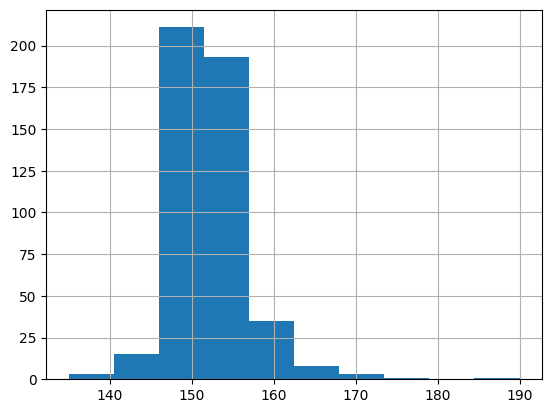

In [446]:
df_delivery['height_in_msq'] = df_delivery['height_in_msq']
